### Student ID: 18195067
### Student Name: Abhijit Sinha

# Task 4  (CE6002) : Linear regression
*Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible fit to the data set Task4.csv. Your regression performance should improve if you add some new features..*

*Also, use an algorithm from the scikit-learn toolbox to see if you can do better. You should not add any other imports than those necessary for your chosen scikit-learn algorithm.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split

### Tasks:

A. Change your linear classification algorithm to make it suitable for linear regression

B. Use this to obtain the **best possible regression** of the data set Task4.csv. 
    - Your regression performance should improve if you add some new features.
C. Use an algorithm from the scikit-learn toolbox to see if you can do better

### Check:
- Implementation of linear regression : 
    - Correct implementation with properly normalised error calculation
        - Used MSE
- Quality of the newly created features in Task 4 : 
    - Suitable features used and systematic approach to finding these features
        - Used a combination of X, X_squared and X+X_squared values

In [2]:
# Read the Task4 csv file using pandas library
df = pd.read_csv("./Task4.csv")

In [3]:
df.head()

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [4]:
df.tail()

,X,y
95,0.96,0.685
96,0.97,0.649
97,0.98,0.662
98,0.99,0.633
99,1.00,0.571


In [5]:
df.describe()

,X,y
count,100.000000,100.000000
mean,0.499995,0.786404
std,0.293037,0.396402
min,0.000000,-0.347000
25%,0.250250,0.639750
50%,0.500000,0.928000
75%,0.749750,1.075000
max,1.000000,1.270000


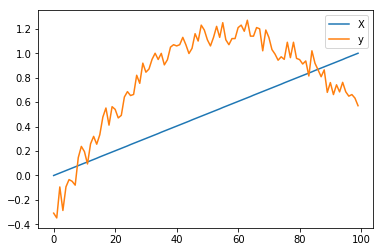

In [6]:
# Plot the data
df.plot(kind='line')

### A. Reusing the functions from Task-3 notebook and making it suitable Linear regression

References: 
1. Error calculation: https://machinelearningmastery.com/implement-machine-learning-algorithm-performance-metrics-scratch-python/

In [7]:
def get_weights(X, y):
    # Function to find the weight matrix    
    weight_matrix = np.zeros(1 + X.shape[1])
    pseudo_inv_matrix = np.linalg.pinv(X)
    weight_matrix = pseudo_inv_matrix.dot(y)
    return weight_matrix


def y_hat(X, weight_matrix):
    # Function to calculate the y_hat
    return (np.dot(X, np.transpose(weight_matrix)))


def predict_class(X, weight_matrix):
    # Function to predict the classification label for the input data X
    return np.sign(y_hat(X, weight_matrix))


def calc_MSE(actual, predicted):
    # Function to calculate the Mean squared error
    mse = np.mean((actual - predicted)**2)
    return mse


def get_slope(X, weights):
    # Funtion to get the regression line for polynomial features
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 


def linear_regression(X, y, title=""):
    # Function to calulate the weights and plot the decision boundary
       
    # Split data in train and test set with 20% samples as test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=y, random_state=42)

    # Get the weights from the train data
    weights = get_weights(X_train, y_train)

    # Create figure for plotting
    plt.figure(figsize=(6, 5))
    plt.title(title)
    
    # Plot the data samples, note X[:,0] is the Bias column
    plt.scatter(X[:,1], y, c='cyan', marker='o', s=30, edgecolors='m', label='Samples')
    
    # Getting the X and Y position
    x_min, x_max = X.min(), X.max() 
    x_line = np.linspace(x_min, x_max, X.shape[0])
    y_line = get_slope(x_line, weights)
    
    # Plot the decision boundary
    plt.plot(x_line, y_line, 'b-.', linewidth=2.2, label="Model")  
    
    plt.legend(loc="best")
    plt.show()
    
    # Calculate the error
    error = calc_MSE(y_test,  y_hat(X_test, weights))
        
    return weights, error

### Linear Regression

#### B. Use this to obtain the best possible regression of the data set Task4.csv.
- Your regression performance should improve if you add some new features.

#### Linear Regression on X 

In [8]:
# Get the values of X and y from dataframe
X = df.X.values
y = df.y.values

# Create the constant bias term
bias = np.ones(len(X))

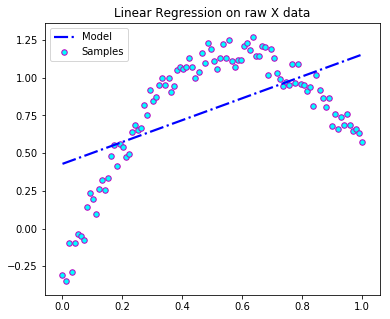

Input X shape (100, 2)
Weights: [0.42876122 0.72390652]
Error: 0.09353840638313976


In [9]:
# Create the input with constant bias and X features
X_input = np.c_[bias, X]

weights, error = linear_regression(X_input, y, title='Linear Regression on raw X data')

print("Input X shape", X_input.shape)
print("Weights:", weights)
print("Error:", error)

#### Linear Regression on X^2 data

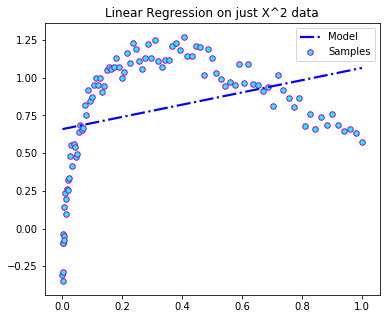

Input X shape (100, 2)
Weights: [0.6588306  0.40547111]
Error: 0.13945917157624488


In [10]:
# Square the input data
X_sqr = np.square(X)

# Create the input with constant bias and X^2 features
X_input = np.c_[bias, X_sqr]

weights, error = linear_regression(X_input, y, title='Linear Regression on just X^2 data')

print("Input X shape", X_input.shape)
print("Weights:", weights)
print("Error:", error)

#### Linear Regression on X and X^2 data combined

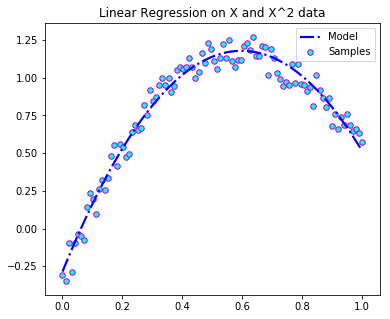

Input X shape (100, 3)
Weights: [-0.28548779  4.89446178 -4.09325841]
Error: 0.004870265424297493


In [11]:
# Square the input data
X_sqr = np.square(X)

# Create the input with constant bias, X and X^2 features
X_input = np.c_[bias, X, X_sqr]

weights, error = linear_regression(X_input, y, title='Linear Regression on X and X^2 data')

print("Input X shape", X_input.shape)
print("Weights:", weights)
print("Error:", error)

#### Linear Regression on X, X^2 and X^3 data combined

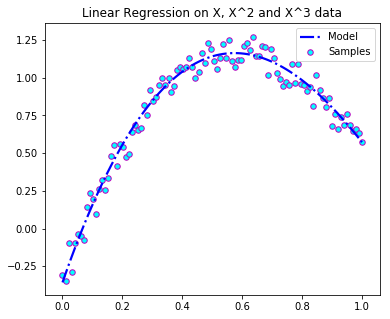

Input X shape (100, 4)
Weights: [-0.35688358  5.73514927 -6.15249864  1.34627111]
Error: 0.0045586092710415


In [12]:
# Square the input data
X_sqr = np.square(X)

# Cube the input data
X_cube = np.power(X, 3)

# Create the input with constant bias, X, X^2 and X^3 features
X_input = np.c_[bias, X, X_sqr, X_cube]

weights, error = linear_regression(X_input, y, title='Linear Regression on X, X^2 and X^3 data')

print("Input X shape", X_input.shape)
print("Weights:", weights)
print("Error:", error)

### Observations:

The Mean Squared error is very low if we use the combined data of X its square and cube in the linear regression. The error is high if we just use X or X square values.

There is slight improvement if we go higher in the order of data.

Below is the summary of features used w.r.t regression error:

|Features used| Mean Squared Error(approx)   |
|----------------|---------------|
|Only X|0.093|
|Only X^2|0.139|
|Combination of X and X^2|0.0049|
|Combination of X, X^2 and X^3|0.0045|

### C. Use an algorithm from the scikit-learn toolbox to see if you can do better

Note: You should not add any other imports than those necessary for your chosen scikit-learn algorithm.

Reference: 
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2. https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

### Scikit-learn Linear Regression:

R² score of the model: 0.4645382880058122


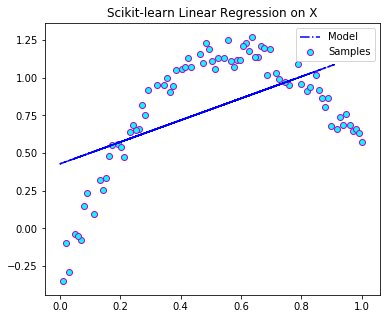

In [13]:
from sklearn.linear_model import LinearRegression

X_reg = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_reg, y, test_size=0.2, random_state=42)

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
score = model.score(X_test, y_test)

# Plot the regression curve
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, c='cyan', edgecolors='m', label='Samples')
plt.plot(X_test, predictions, 'b-.', label='Model')

# Print the R2 score: the percentage of explained variance of the predictions
print('R² score of the model:', score)
plt.title('Scikit-learn Linear Regression on X')
plt.legend(loc="best")
plt.show()

Not the best result! 

### TODO: Try using feature transformation and other scikit learn regression 

Options to build features and test:
1. Polynomial features
2. Use pipeline method to build features and test systematically

Reference: 
1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
2. https://www.jeremyjordan.me/polynomial-regression/

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X_reg)


array([[1.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.01000e-02, 1.02010e-04],
       [1.00000e+00, 2.02000e-02, 4.08040e-04],
       [1.00000e+00, 3.03000e-02, 9.18090e-04],
       [1.00000e+00, 4.04000e-02, 1.63216e-03],
       [1.00000e+00, 5.05000e-02, 2.55025e-03],
       [1.00000e+00, 6.06000e-02, 3.67236e-03],
       [1.00000e+00, 7.07000e-02, 4.99849e-03],
       [1.00000e+00, 8.08000e-02, 6.52864e-03],
       [1.00000e+00, 9.09000e-02, 8.26281e-03],
       [1.00000e+00, 1.01000e-01, 1.02010e-02],
       [1.00000e+00, 1.11000e-01, 1.23210e-02],
       [1.00000e+00, 1.21000e-01, 1.46410e-02],
       [1.00000e+00, 1.31000e-01, 1.71610e-02],
       [1.00000e+00, 1.41000e-01, 1.98810e-02],
       [1.00000e+00, 1.52000e-01, 2.31040e-02],
       [1.00000e+00, 1.62000e-01, 2.62440e-02],
       [1.00000e+00, 1.72000e-01, 2.95840e-02],
       [1.00000e+00, 1.82000e-01, 3.31240e-02],
       [1.00000e+00, 1.92000e-01, 3.68640e-02],
       [1.00000e+00, 2.02000e-01, 4.0804

### Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

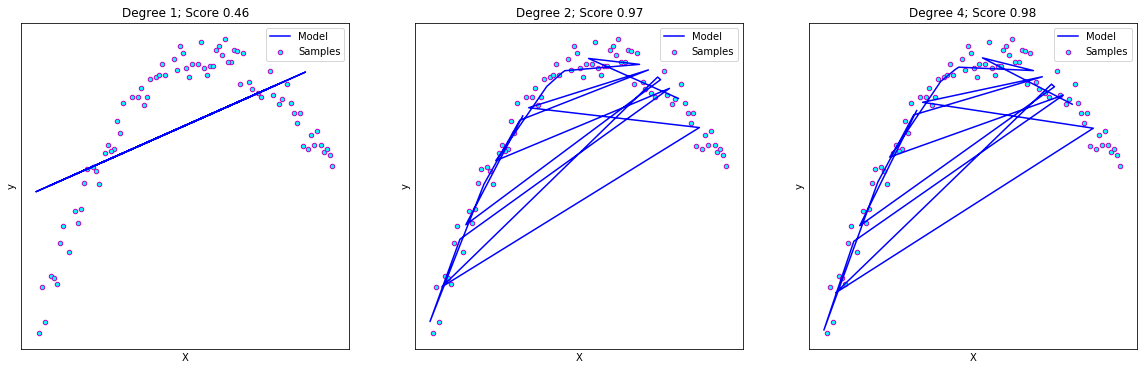

In [15]:
degrees = [1, 2, 4]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y, test_size=0.2, random_state=42)

plt.figure(figsize=(20, 6))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    
    predictions = pipeline.predict(X_test)
    score = pipeline.score(X_test, y_test)
    
    plt.scatter(X_train, y_train, c='cyan', edgecolors='m', s=20, label="Samples")
    plt.plot(X_test, predictions, 'b', label="Model")

    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}; Score {:.2f}".format(degrees[i], score))
plt.show()